I'm sick of using pyspeckit, it doesnt seem particularly well written, and it's unnecesarily complicated, and it doesn't seem to play well with my python3 install

can I replace it with astropy functions?

In [3]:
from pyspeckit.spectrum.models.inherited_voigtfitter import voigt
import numpy as np
master_dat = np.loadtxt('sodium_spectrum.dat')
wvl = master_dat[:,0]
wvl = np.array(wvl)
x = [10, 5888, 10, 1]
amp = x[0]
line_cen = x[1]
fwhm = 0.4*abs(x[2])
ratio = abs(x[3])

Lfwhm = fwhm / (0.5346 + (0.2166 + (ratio**-2))**0.5)
Gfwhm = fwhm / (0.5346*ratio + (0.2166*ratio**2.0 + 1)**0.5)
line = voigt(wvl,amp,line_cen,Gfwhm,Lfwhm,normalized=False)

ps_line = amp*line/max(line)
import numpy as np
from astropy.modeling.models import Voigt1D
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure()
v1 = Voigt1D(x_0=x[1], amplitude_L=amp, fwhm_L=Lfwhm, fwhm_G=Gfwhm)
ap_line =  v1(wvl)

ap_line = amp*ap_line/max(ap_line)

plt.plot(wvl,ps_line,'g')
plt.plot(wvl,ap_line,'b')
plt.show()

In [10]:
print wvl[np.argmax(ps_line)], wvl[np.argmax(ap_line)]

5888.0 5887.65


the astropy implementation is wrong

In [11]:
print wvl[np.argmax(ps_line)], wvl[np.argmax(ap_line)+35]

5888.0 5888.0


out by 35 !

#They modified astropy!

In [1]:
import astropy
from pyspeckit.spectrum.models.inherited_voigtfitter import voigt
import numpy as np

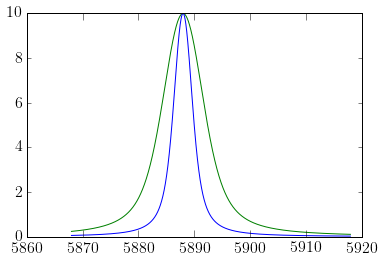

In [2]:
master_dat = np.loadtxt('sodium_spectrum.dat')
wvl = master_dat[:,0]
wvl = np.array(wvl)
x = [10, 5888, 10, 1]
amp = x[0]
line_cen = x[1]
fwhm = 0.4*abs(x[2])
ratio = abs(x[3])

Lfwhm = fwhm / (0.5346 + (0.2166 + (ratio**-2))**0.5)
Gfwhm = fwhm / (0.5346*ratio + (0.2166*ratio**2.0 + 1)**0.5)
line = voigt(wvl,amp,line_cen,Gfwhm,Lfwhm,normalized=False)

ps_line = amp*line/max(line)
import numpy as np
from astropy.modeling.models import Voigt1D
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure()
v1 = Voigt1D(x_0=x[1], amplitude_L=amp, fwhm_L=Lfwhm, fwhm_G=Gfwhm)
ap_line =  v1(wvl)

ap_line = amp*ap_line/max(ap_line)

plt.plot(wvl,ps_line,'g')
plt.plot(wvl,ap_line,'b')
plt.show()

This does seem to have done the trick - however the difference with the voigt model I use is still there.

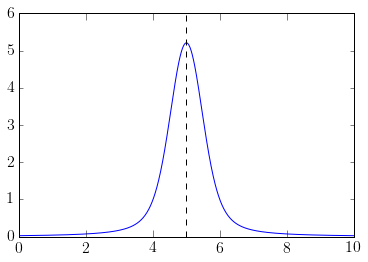

In [3]:
import numpy as np
from astropy.modeling.models import Voigt1D
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
x = np.arange(0, 10, 0.01)
v1 = Voigt1D(x_0=5, amplitude_L=10, fwhm_L=0.5, fwhm_G=0.9)
plt.plot(x, v1(x))
plt.axvline(v1.x_0, color='k',ls='--')
plt.show()

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from stsci.convolve._lineshape import voigt
from astropy.modeling.models import Voigt1D

x = np.arange(0,10, 0.01)
v1 = Voigt1D(x_0=5, amplitude_L=10, fwhm_L=0.5, fwhm_G=0.9)
v2 = 10 * voigt(x, (0.9,0.5), xc=5)

plt.figure()
plt.plot(x, v1(x))
plt.plot(x, v2)
plt.axvline(v1.x_0, color='k', ls='--')
plt.show()

ImportError: No module named convolve._lineshape

In [8]:
help(stsci)

Help on package stsci:

NAME
    stsci

FILE
    /home/astro/phrmat/anaconda/lib/python2.7/site-packages/stsci.distutils-0.3.7-py2.7.egg/stsci/__init__.py

PACKAGE CONTENTS
    distutils (package)


